In [2]:
import pandas as pd

# Load the top features dataset
df = pd.read_csv("/Users/rutujashingate/Desktop/sleep-ml-project/data/processed/smartwatch_top_features.csv")
print(df.shape)
df.head()

(20000, 21)


,sleep_efficiency,stress_score,sleep_stage_deep_pct,sleep_stage_rem_pct,sleep_stage_light_pct,sleep_stage_awake_pct,caffeine_mg,bedtime_consistency_std_min,hrv_rmssd_ms,room_humidity_pct,...,ambient_noise_db,height_cm,room_temperature_c,age,screen_time_before_bed_min,activity_before_bed_min,weight_kg,respiration_rate_bpm,jetlag_hours,sleep_score_raw
0,0.962,33,0.156,0.158,0.533,0.153,126,37.1,31.1,0.575,...,38.9,166.1,23.7,50,87,39,94.2,14.4,-11,59
1,0.936,20,0.206,0.165,0.520,0.110,92,9.6,36.9,0.484,...,30.6,172.4,22.3,40,0,1,87.3,15.5,8,61
2,0.871,29,0.200,0.223,0.493,0.084,150,35.5,23.2,0.284,...,21.5,158.0,25.4,26,37,5,93.3,13.3,8,58
3,0.953,41,0.133,0.171,0.529,0.166,83,65.4,5.0,0.467,...,34.5,152.6,23.0,66,71,69,53.8,13.0,4,53
4,0.992,54,0.220,0.211,0.507,0.063,29,0.4,39.6,0.422,...,31.1,155.1,21.8,72,31,49,78.4,13.8,-5,60


In [3]:
X = df.drop(columns=["sleep_score_raw"])
y = df["sleep_score_raw"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📉 RMSE: 3.08
✅ R² Score: 0.66


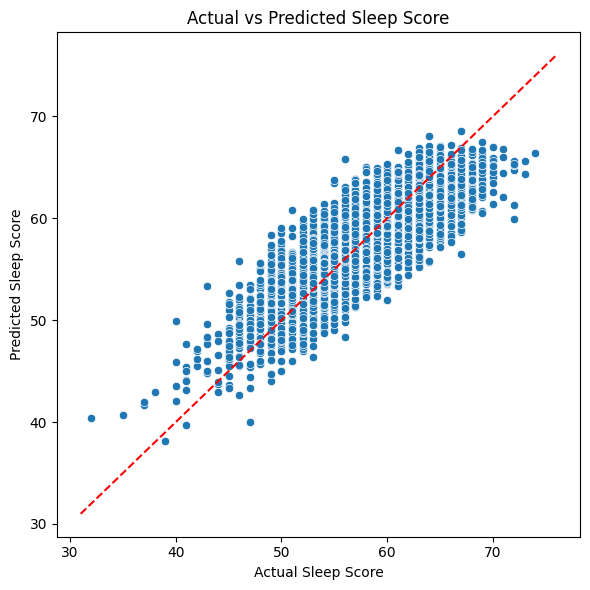

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal
plt.xlabel("Actual Sleep Score")
plt.ylabel("Predicted Sleep Score")
plt.title("Actual vs Predicted Sleep Score")
plt.tight_layout()
plt.show()


In [10]:
import shap

In [11]:
# Initialize TreeExplainer for tree-based models like RandomForest
explainer = shap.Explainer(model)
# Explain predictions on a sample of the test set
shap_values = explainer(X_test)

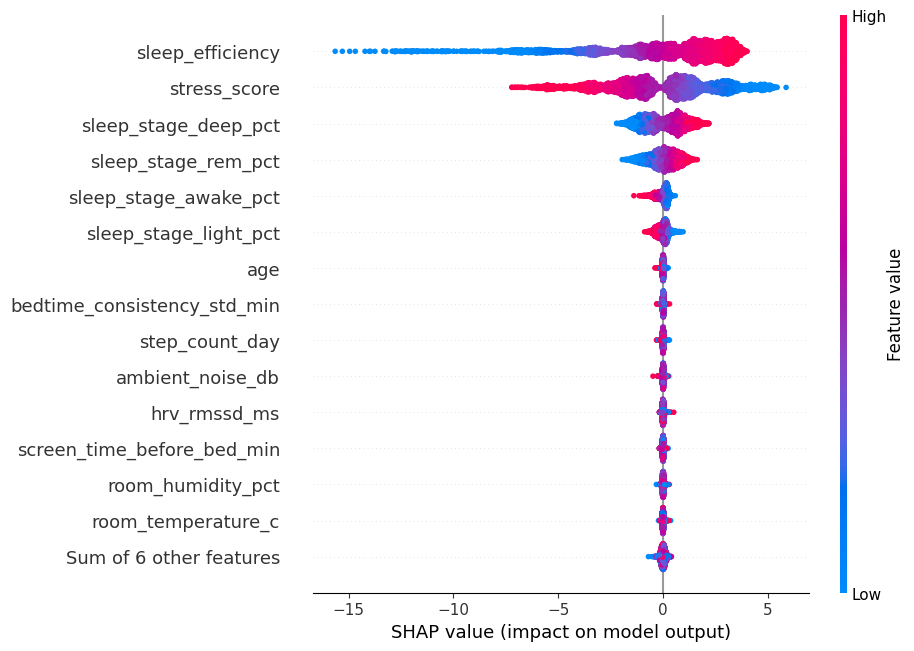

In [12]:
shap.plots.beeswarm(shap_values, max_display=15)


In [14]:
import joblib

# Save model
joblib.dump(model, "/Users/rutujashingate/Desktop/sleep-ml-project/models/smartwatch_model.pkl")

['/Users/rutujashingate/Desktop/sleep-ml-project/models/smartwatch_model.pkl']